# Recovery of gold from ore

It is necessary to prepare a prototype of a machine learning model for the "Digit". The company develops solutions for the efficient operation of industrial enterprises.

The model should predict the recovery rate of gold from gold-bearing ore. We use data with extraction and purification parameters.

The model will help optimize production so as not to launch an enterprise with unprofitable characteristics.

We need to:

1. Prepare the data;
2. Conduct a research analysis of the data;
3. Build and train a model.

## Technology.

**Stages of obtaining gold from mining ore**

1. *Flotation*

A mixture of gold-bearing ore is fed into the flotation plant. After enrichment, a rough concentrate and "dump tails" are obtained, that is, product residues with a low concentration of valuable metals.
The stability of this process is affected by the unstable and not optimal physico-chemical state of the flotation pulp (a mixture of solid particles and liquid).


2. *Cleaning*

The rough concentrate undergoes two purifications. At the output, the final concentrate and new dump tails are obtained.

**Technological process**

- Rougher feed — raw materials
- Rougher additives (or reagent additives) — Flotation reagents: Xanthate, Sulfate, Depressant
- Xanthate **— xanthogenate (promoter, or flotation activator);
- Sulfate — sulfate (in this production sodium sulfide);
- Depressant — depressant (sodium silicate).
- Rougher process (English "rough process") — flotation
- Rougher tails — dump tails
- Float banks — flotation plant
- Cleaner process — cleaning
- Rougher Au — rough gold concentrate
- Final Au — final gold concentrate

**Stage Parameters**

- air amount — air volume
- fluid levels — liquid level
- feed size — the size of the raw material granules
- feed rate — feed rate

According to the provided information, the data in the upload is presented in the following form:

**Type of feature**
- the general name of the attribute [stage].[parameter type].[parameter name]

**Possible values for the [stage] block:**
- rougher — flotation
- primary_cleaner — primary cleaning
- secondary_cleaner — secondary cleaning
- final — final characteristics

**Possible values for the [parameter type] block:**
- input — raw material parameters
- output — product parameters
- state — parameters characterizing the current state of the stage
- calculation — calculated characteristics

## Data preprocessing

In [1]:

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import RandomState
from scipy import stats as st
from numpy.random import RandomState
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
from sklearn.metrics import make_scorer, mean_absolute_error, mean_squared_error, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.dummy import DummyRegressor

### 1.1. Data introduction

In [2]:
try:
    
    df_train = pd.read_csv('gold_recovery_train_new.csv', index_col = 'date')
    df_test = pd.read_csv('gold_recovery_test_new.csv', index_col = 'date')
    df_full = pd.read_csv('gold_recovery_full_new.csv', index_col = 'date')

except:
    #
    df_train = pd.read_csv('/datasets/gold_recovery_train_new.csv', index_col = 'date')
    df_test = pd.read_csv('/datasets/gold_recovery_test_new.csv', index_col = 'date')
    df_full = pd.read_csv('/datasets/gold_recovery_full_new.csv', index_col = 'date')

1. Train sample

In [3]:
df_train.head()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,123.819808,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,122.270188,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,117.988169,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


2. Test sample

In [4]:
df_test.head()

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,-500.704369,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,-499.240168,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,-502.151509,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,-498.355873,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,-500.810606,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


3. Full dataset

In [5]:
df_full.head()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,123.819808,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,122.270188,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,117.988169,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14149 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         14148 non-null  float64
 1   final.output.concentrate_pb                         14148 non-null  float64
 2   final.output.concentrate_sol                        13938 non-null  float64
 3   final.output.concentrate_au                         14149 non-null  float64
 4   final.output.recovery                               14149 non-null  float64
 5   final.output.tail_ag                                14149 non-null  float64
 6   final.output.tail_pb                                14049 non-null  float64
 7   final.output.tail_sol                               14144 non-null  float64
 8   final.output.tail_au                             

In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5290 entries, 2016-09-01 00:59:59 to 2017-12-31 23:59:59
Data columns (total 52 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   primary_cleaner.input.sulfate               5286 non-null   float64
 1   primary_cleaner.input.depressant            5285 non-null   float64
 2   primary_cleaner.input.feed_size             5290 non-null   float64
 3   primary_cleaner.input.xanthate              5286 non-null   float64
 4   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 5   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 6   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 8   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_level    5290 non-null

In [8]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19439 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         19438 non-null  float64
 1   final.output.concentrate_pb                         19438 non-null  float64
 2   final.output.concentrate_sol                        19228 non-null  float64
 3   final.output.concentrate_au                         19439 non-null  float64
 4   final.output.recovery                               19439 non-null  float64
 5   final.output.tail_ag                                19438 non-null  float64
 6   final.output.tail_pb                                19338 non-null  float64
 7   final.output.tail_sol                               19433 non-null  float64
 8   final.output.tail_au                             

**Output 1.1**

According the  reviewed data, we can notice:

1) The number of features (columns) in the df_train and df_full datasets is 87. At the same time, the number of features in the test sample is 53. According to the introductory data, there are fewer features in the test sample and there is no target feature.

2) There are missing values in all datasets. This may be due to 2 factors:

- Some parameters are not available because they are measured and/or calculated much later. Because of this, some features that may be in the training sample are missing in the test sample. Also, there are no target features in the test set.

- Errors when uploading the dataset or incomplete data

### 1.2. Checking the calculation of the efficiency of gold enrichment

At the next stage, we will check the correctness of the formula for calculating the efficiency of gold enrichment. The formula for calculating the efficiency of gold enrichment is as follows

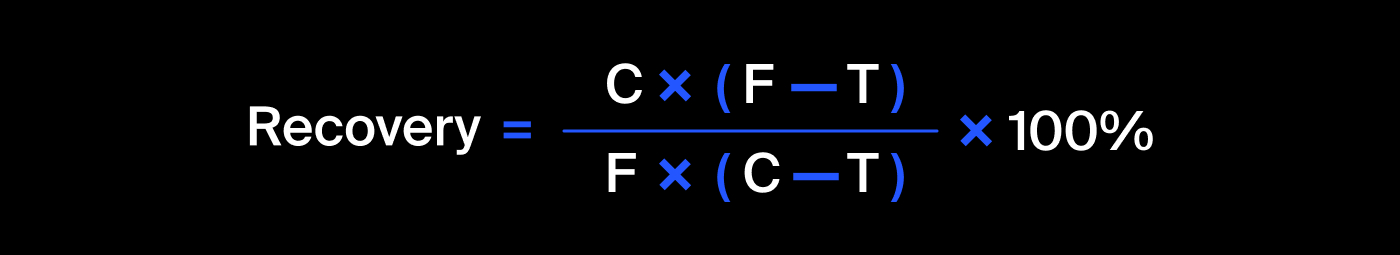



C - the proportion of gold in the concentrate after flotation/purification;

F - the proportion of gold in the raw material/concentrate before flotation/purification;

T - the proportion of gold in the tailings after flotation/purification.

Therefore, to calculate, we first need to calculate the proportion of gold in the concentrate and tails in the ***rougher.output.recovery.*** feature (flotation.exit.restoration), that is, the efficiency of enrichment after flotation (the first stage).

To do this, consider a training sample:

1) There is no target attribute in the full source dataset.

2) We will necessarily perform preprocessing in the test sample, so we need to understand what is wrong with it.

For convenience, we will select the necessary features from the training sample to calculate the efficiency of enrichment during flotation.

In [9]:
df_train_rougher = df_train[['rougher.input.feed_ag','rougher.input.feed_pb','rougher.input.feed_sol',
                            'rougher.input.feed_au','rougher.output.concentrate_ag','rougher.output.concentrate_pb',
                            'rougher.output.concentrate_sol','rougher.output.concentrate_au','rougher.output.recovery',
                            'rougher.output.tail_ag', 'rougher.output.tail_pb','rougher.output.tail_sol',
                            'rougher.output.tail_au']]
            
df_train_rougher.head()        

,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_au,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au
date,,,,,,,,,,,,,
2016-01-15 00:00:00,6.100378,2.284912,36.808594,6.486150,11.500771,7.101074,28.029297,19.793808,87.107763,5.008018,0.508728,19.154297,1.170244
2016-01-15 01:00:00,6.161113,2.266033,35.753385,6.478583,11.615865,7.278807,28.067063,20.050975,86.843261,4.955378,0.536689,18.965234,1.184827
2016-01-15 02:00:00,6.116455,2.159622,35.971630,6.362222,11.695753,7.216833,27.454037,19.737170,86.842308,4.843460,0.546416,18.808533,1.162562
2016-01-15 03:00:00,6.043309,2.037807,36.862241,6.118189,11.915047,7.175616,27.341277,19.320810,87.226430,4.655288,0.542525,19.330200,1.079755
2016-01-15 04:00:00,6.060915,1.786875,34.347666,5.663707,12.411054,7.240205,27.041023,19.216101,86.688794,4.552800,0.515438,19.267422,1.012642


In [10]:

df_train['rough_recov_calc'] = 100 * (df_train['rougher.output.concentrate_au']*\
                                      (df_train['rougher.input.feed_au']-df_train['rougher.output.tail_au']))/\
                                      (df_train['rougher.input.feed_au']*\
                                      (df_train['rougher.output.concentrate_au']-df_train['rougher.output.tail_au']))


df_train[['rough_recov_calc', 'rougher.output.recovery']].head(10) 

,rough_recov_calc,rougher.output.recovery
date,,
2016-01-15 00:00:00,87.107763,87.107763
2016-01-15 01:00:00,86.843261,86.843261
2016-01-15 02:00:00,86.842308,86.842308
2016-01-15 03:00:00,87.226430,87.226430
2016-01-15 04:00:00,86.688794,86.688794
2016-01-15 05:00:00,88.156912,88.156912
2016-01-15 06:00:00,88.168065,88.168065
2016-01-15 07:00:00,87.668336,87.668336
2016-01-15 08:00:00,87.035862,87.035862


Let's calculate the MAE metric for the calculated and provided recovery efficiency after flotation in the training sample.

In [11]:
rough_recov_mae = mean_absolute_error(df_train['rougher.output.recovery'], df_train['rough_recov_calc'])
rough_recov_mae

1.1131451184435918e-14

**Conclusion**

The value of the average absolute deviation is insignificant. Therefore, the formula for calculating the recovery efficiency works correctly, including in previously calculated data in the original dataset.

**Comparison of samples.**

As it was notices earlier, the number of features in the test sample is less than in the training and complete.
Let's check what signs are missing in the test sample.

In [12]:
df_train_columns = list(df_train.columns)
df_test_columns = list(df_test.columns)

absent_col_in_test = []

for i in range(len(df_train_columns)):
    if df_train_columns[i] not in df_test_columns:
        absent_col_in_test.append(df_train_columns[i])
        
absent_col_in_test

['final.output.concentrate_ag',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.concentrate_au',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'final.output.tail_au',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'primary_cleaner.output.tail_au',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.au_pb_ratio',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.concentrate_au',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_pb',
 'rougher.output.ta

In [13]:
len(absent_col_in_test)

35

Excluding rough_recov_calc (calculated recovery efficiency, which we previously calculated), there are 34 signs missing in the test sample by:

- final output after cleaning (shares in concentrates, tailings, recovery efficiency);
- flotation (shares in concentrates, tailings, recovery efficiency);
- the primary stage of purification (fractions in concentrates and tailings);
- secondary stage of purification (fractions in tails);
- concentrations of substances for flotation.

**Conclusion 1.2**

Therefore, in the further preparation of the prediction model, we will have to exclude these features from the training sample.

### 1.3. Data preprocessing

**Train sample**

In [14]:
df_train.duplicated().sum()

0

There are no obvious duplicates. Let's check the number of omissions in the training sample.

In [15]:
df_train.isna().sum().value_counts()

1       30
0       25
100      3
4        3
2        3
8        2
78       1
21       1
217      1
1605     1
10       1
436      1
22       1
428      1
36       1
29       1
3        1
144      1
211      1
46       1
15       1
286      1
86       1
32       1
20       1
5        1
6        1
Name: count, dtype: int64

According to the obtained data, we can notice that the number of omissions is insignificant.

Additionally, we will check the maximum number of omissions and find the column.

In [16]:
df_train.isna().sum().max()

1605

In [17]:
df_train.isna().sum().sort_values(ascending = False)

secondary_cleaner.output.tail_sol           1605
rougher.state.floatbank10_e_air              436
rougher.input.floatbank11_xanthate           428
primary_cleaner.output.concentrate_sol       286
secondary_cleaner.state.floatbank2_a_air     217
                                            ... 
rougher.output.tail_au                         0
rougher.state.floatbank10_d_air                0
rougher.state.floatbank10_d_level              0
rougher.state.floatbank10_e_level              0
rough_recov_calc                               0
Length: 87, dtype: int64

In [18]:
isna_ratio_1 = df_train['secondary_cleaner.output.tail_sol'].isna().sum()/14149
isna_ratio_1

0.11343557848611209

In [19]:
isna_ratio_2 = df_train['rougher.state.floatbank10_e_air'].isna().sum()/14149
isna_ratio_2

0.030814898579404906

In [20]:
isna_ratio_3 = df_train['rougher.input.floatbank11_xanthate'].isna().sum()/14149
isna_ratio_3

0.03024948759629656

The highest percentage of skips (11%) in the secondary_cleaner.output.tail_sol column. This column indicates waste after the 2nd stage of purification. Sol transcripts are in our tech.there is no documentation, so this indicator can have several values: solvent (solvent), solid (solid).

Let's check the distribution of this value.

<Axes: >

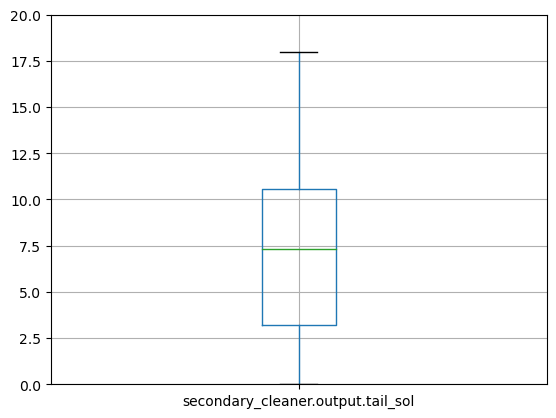

In [21]:
plt.ylim(0,20)
df_train.boxplot('secondary_cleaner.output.tail_sol')

As main volume of the value of `secondary_cleaner.output.tail_sol` is in the range from 3 to 10.5, replace the skip with the median value.

In [22]:
df_train['secondary_cleaner.output.tail_sol'] = df_train['secondary_cleaner.output.tail_sol'].fillna(df_train['secondary_cleaner.output.tail_sol'].median())
df_train['secondary_cleaner.output.tail_sol'].isna().sum()

0

Taking into account that the gaps in the remaining dataset objects are less than 3%, we will delete them.

In [23]:
df_train = df_train.dropna()

Let's check for omissions in the target features in the training sample.

In [24]:
df_train.loc[df_train.loc[:,'rougher.output.recovery'] == 0]['rougher.output.recovery'].count()

206

In [25]:
df_train.loc[df_train.loc[:,'final.output.recovery'] == 0]['final.output.recovery'].count()

31

**Test sample**

In [26]:
df_test.duplicated().sum()

0

There aren't obvious duplicates. Let's check the number of passes.

In [27]:
df_test.isna().sum()

primary_cleaner.input.sulfate                  4
primary_cleaner.input.depressant               5
primary_cleaner.input.feed_size                0
primary_cleaner.input.xanthate                 4
primary_cleaner.state.floatbank8_a_air         0
primary_cleaner.state.floatbank8_a_level       0
primary_cleaner.state.floatbank8_b_air         0
primary_cleaner.state.floatbank8_b_level       0
primary_cleaner.state.floatbank8_c_air         0
primary_cleaner.state.floatbank8_c_level       0
primary_cleaner.state.floatbank8_d_air         0
primary_cleaner.state.floatbank8_d_level       0
rougher.input.feed_ag                          0
rougher.input.feed_pb                          0
rougher.input.feed_rate                        3
rougher.input.feed_size                        1
rougher.input.feed_sol                        21
rougher.input.feed_au                          0
rougher.input.floatbank10_sulfate              5
rougher.input.floatbank10_xanthate             0
rougher.input.floatb

In [28]:
df_test.isna().sum().value_counts()

0     40
4      2
5      2
3      2
1      1
21     1
8      1
25     1
2      1
9      1
Name: count, dtype: int64

In [29]:
isna_ratio_test = df_test['rougher.input.floatbank11_xanthate'].isna().sum()/5290
isna_ratio_test

0.004725897920604915

As the number of omissions in the test sample is insignificant, we will get rid of the missing values.

In [30]:
df_test = df_test.dropna()
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5229 entries, 2016-09-01 00:59:59 to 2017-12-31 23:59:59
Data columns (total 52 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   primary_cleaner.input.sulfate               5229 non-null   float64
 1   primary_cleaner.input.depressant            5229 non-null   float64
 2   primary_cleaner.input.feed_size             5229 non-null   float64
 3   primary_cleaner.input.xanthate              5229 non-null   float64
 4   primary_cleaner.state.floatbank8_a_air      5229 non-null   float64
 5   primary_cleaner.state.floatbank8_a_level    5229 non-null   float64
 6   primary_cleaner.state.floatbank8_b_air      5229 non-null   float64
 7   primary_cleaner.state.floatbank8_b_level    5229 non-null   float64
 8   primary_cleaner.state.floatbank8_c_air      5229 non-null   float64
 9   primary_cleaner.state.floatbank8_c_level    5229 non-null

## Data analysis

Let's come to know the process of recovering gold from ore in more detail.

### 2.1. Changing the concentration of elements in the cleaning process

Consider the change in the concentration of elements Au, Ag, Pb in the purification process.

Let's separate these features into a separate dataset (df_concentration).

In [31]:
df_concentration = df_train[['rougher.input.feed_ag','rougher.input.feed_pb','rougher.input.feed_au',
                            'rougher.output.concentrate_ag','rougher.output.concentrate_pb','rougher.output.concentrate_au',
                            'primary_cleaner.output.concentrate_ag','primary_cleaner.output.concentrate_pb','primary_cleaner.output.concentrate_au',
                            'final.output.concentrate_ag','final.output.concentrate_pb','final.output.concentrate_au']]
df_concentration.head()

,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_au,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_au,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_au
date,,,,,,,,,,,,
2016-01-15 00:00:00,6.100378,2.284912,6.486150,11.500771,7.101074,19.793808,8.547551,10.389648,34.174427,6.055403,9.889648,42.192020
2016-01-15 01:00:00,6.161113,2.266033,6.478583,11.615865,7.278807,20.050975,8.558743,10.497069,34.118526,6.029369,9.968944,42.701629
2016-01-15 02:00:00,6.116455,2.159622,6.362222,11.695753,7.216833,19.737170,8.603505,10.354494,33.969464,6.055926,10.213995,42.657501
2016-01-15 03:00:00,6.043309,2.037807,6.118189,11.915047,7.175616,19.320810,7.221879,8.496563,28.260743,6.047977,9.977019,42.689819
2016-01-15 04:00:00,6.060915,1.786875,5.663707,12.411054,7.240205,19.216101,9.089428,9.986786,33.044932,6.148599,10.142511,42.774141


In [32]:
df_concentration.describe()

,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_au,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_au,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_au
count,12245.000000,12245.000000,12245.000000,12245.000000,12245.000000,12245.000000,12245.000000,12245.000000,12245.000000,12245.000000,12245.000000,12245.000000
mean,8.608579,3.557660,7.940149,11.813971,7.737378,19.628357,8.275255,9.694681,32.396620,5.084075,10.217381,44.235977
std,1.896136,1.066716,1.829443,2.587167,1.762359,3.495520,1.932572,2.597600,5.438798,1.324223,1.574890,4.137740
min,0.010000,0.010000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.143893,2.811830,6.669860,10.509719,6.896294,18.577989,7.172502,8.444144,30.787406,4.173854,9.342016,43.344487
50%,8.148057,3.459495,7.688152,11.729089,7.772689,20.045231,8.261417,9.996089,33.099856,4.916966,10.385437,44.898711
75%,10.000623,4.257870,9.066976,13.342284,8.650494,21.478276,9.545107,11.356572,35.202943,5.777093,11.226519,46.166541
max,14.596026,7.142594,13.126043,21.725695,12.797765,28.146838,15.005789,17.081278,45.933934,16.001945,17.031899,51.571885


The table shows that the concentration of elements in the technological process is growing.
For further evaluation of the change in concentricity, we will take the average value from the features for evaluation.

To visualize the dynamics of concentration changes, create a function that will plot the dynamics based on the following parameters:
- Dataframe with concentrations at each stage
- Column names from the dataframe for a specific element
- Specifying the element.

In [33]:
def build_plot(df, columns, element): 
    mean_list = [] 
    mean_list.append(df.mean()) 
    new_df = pd.DataFrame(data = mean_list, columns = columns).transpose() 
    plot = new_df.plot(style='o--', figsize=(15, 6), grid=True)
    plt.title(f'Trend of concentration changes {element}')
    plt.xlabel('Stages of ore recovery')
    plt.ylabel('Concentration')
    return plot

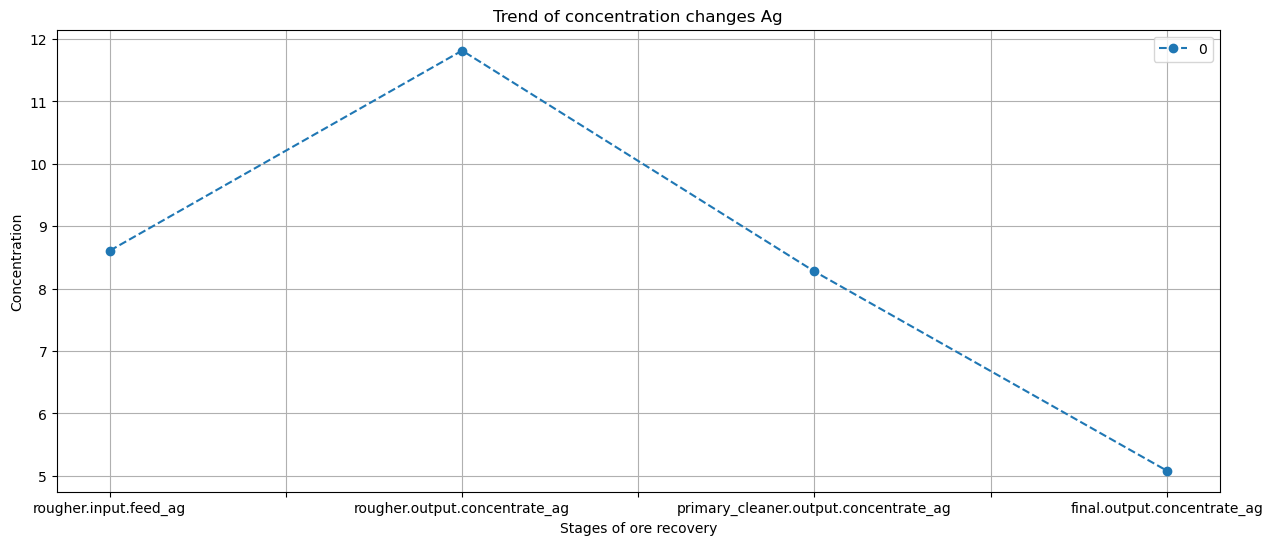

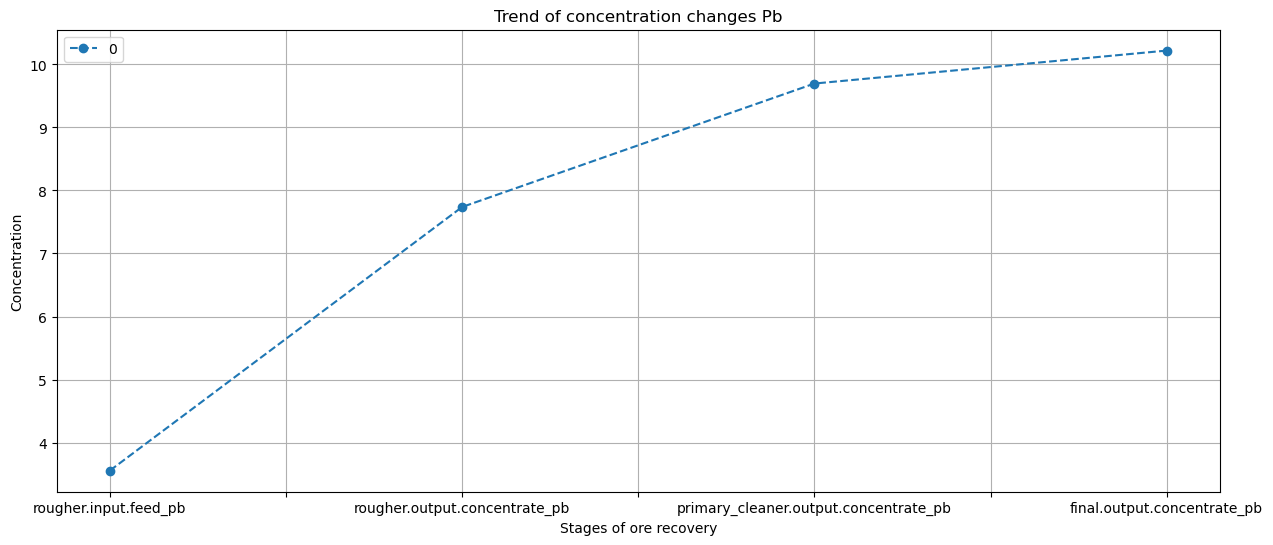

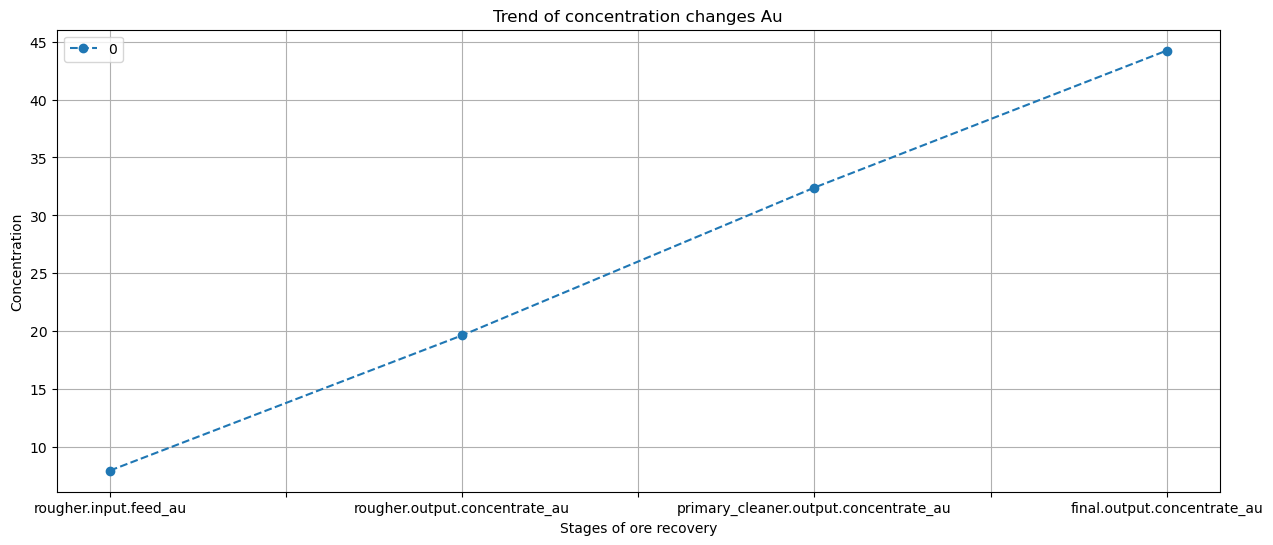

In [34]:
ag_columns = ['rougher.input.feed_ag','rougher.output.concentrate_ag','primary_cleaner.output.concentrate_ag', 'final.output.concentrate_ag']
pb_columns = ['rougher.input.feed_pb','rougher.output.concentrate_pb','primary_cleaner.output.concentrate_pb', 'final.output.concentrate_pb']
au_columns = ['rougher.input.feed_au','rougher.output.concentrate_au','primary_cleaner.output.concentrate_au', 'final.output.concentrate_au']

plot_train_ag = build_plot(df_concentration, ag_columns, 'Ag')
plt.show()
plot_train_pb = build_plot(df_concentration, pb_columns, 'Pb')
plt.show()
plot_train_au = build_plot(df_concentration, au_columns, 'Au')
plt.show()

The metal content varies differently with each stage of processing:

1) The concentration of silver after flotation first increases, then decreases during the subsequent stages of purification. It can be assumed that silver is effectively removed from the sample as part of purification.

2) The concentration of lead increases, while the increase in concentration slows down after primary purification. It can be assumed that the current reagents are not sufficient to completely remove lead, therefore, additional methods of processing and purification from lead will be required when preparing commercial gold.

3) The concentration of gold is constantly increasing during purification (6.5 times). It can be assumed that this technological process is effective for the recovery of gold from ore.

**Output 2.1**

At each stage of purification, the concentration of gold increases significantly.

### 2.2. Comparison of the distribution of raw material granules in the training and test samples.

In [35]:
df_train['rougher.input.feed_size'].describe()

count    12245.000000
mean        58.383086
std         19.396434
min          9.659576
25%         48.791859
50%         54.715501
75%         63.866660
max        484.967466
Name: rougher.input.feed_size, dtype: float64

In [36]:
df_test['rougher.input.feed_size'].describe()

count    5229.000000
mean       55.863978
std        18.914656
min         0.046369
25%        43.911874
50%        50.772729
75%        62.265394
max       392.494040
Name: rougher.input.feed_size, dtype: float64

<Axes: >

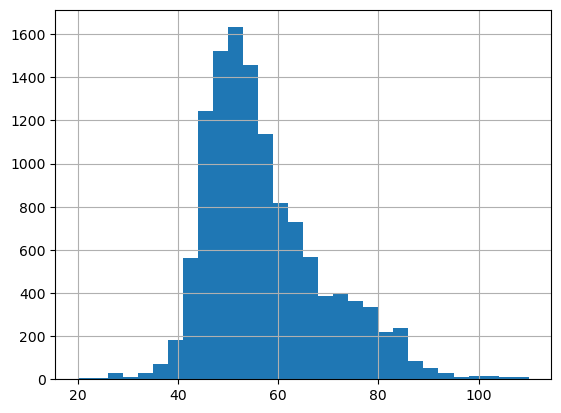

In [37]:
df_train['rougher.input.feed_size'].hist(bins=30, range =(20,110))

<Axes: >

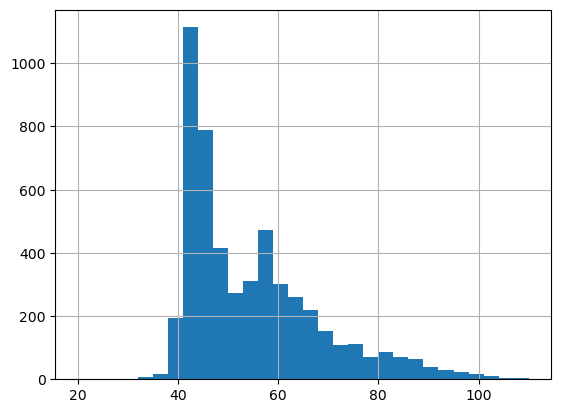

In [38]:
df_test['rougher.input.feed_size'].hist(bins=30, range =(20,110))

**Conclusion 2.2**

The distributions have a similar appearance. Statistical indicators (min, std, quantiles) are comparable.

### 2.3. Исследование суммарной концентрации веществ на всех стадиях.

We study the total concentration of substances at all stages. We also continue to work with the training sample.

To do this, we sum up the concentrations at each stage.

In [39]:
df_sum_conc = df_train

df_sum_conc['rougher.input.raw_sum'] = df_train['rougher.input.feed_ag']+df_train['rougher.input.feed_pb']+\
                                       df_train['rougher.input.feed_sol']+df_train['rougher.input.feed_au']


df_sum_conc['rougher.output.concentrate_sum'] = df_train['rougher.output.concentrate_ag']+df_train['rougher.output.concentrate_pb']+\
                                                df_train['rougher.output.concentrate_sol']+df_train['rougher.output.concentrate_au']


df_sum_conc['primary_cleaner.output.concentrate_sum'] = df_train['primary_cleaner.output.concentrate_ag']+df_train['primary_cleaner.output.concentrate_pb']+\
                                                df_train['primary_cleaner.output.concentrate_sol']+df_train['primary_cleaner.output.concentrate_au']


df_sum_conc['final.output.concentrate_sum'] = df_train['final.output.concentrate_ag']+df_train['final.output.concentrate_pb']+\
                                                df_train['final.output.concentrate_sol']+df_train['final.output.concentrate_au']

df_sum_conc[['rougher.input.raw_sum', 
             'rougher.output.concentrate_sum', 
             'primary_cleaner.output.concentrate_sum',
            'final.output.concentrate_sum']].head()

,rougher.input.raw_sum,rougher.output.concentrate_sum,primary_cleaner.output.concentrate_sum,final.output.concentrate_sum
date,,,,
2016-01-15 00:00:00,51.680034,66.424950,72.640924,63.644396
2016-01-15 01:00:00,50.659114,67.012710,72.543485,63.957723
2016-01-15 02:00:00,50.609929,66.103793,72.095042,64.311180
2016-01-15 03:00:00,51.061546,65.752751,59.957723,63.573449
2016-01-15 04:00:00,47.859163,65.908382,71.321010,64.004667


In [40]:
df_sum_conc[['rougher.input.raw_sum', 
             'rougher.output.concentrate_sum', 
             'primary_cleaner.output.concentrate_sum',
            'final.output.concentrate_sum']].describe()

,rougher.input.raw_sum,rougher.output.concentrate_sum,primary_cleaner.output.concentrate_sum,final.output.concentrate_sum
count,12245.000000,12245.000000,12245.000000,12245.000000
mean,56.702320,67.740021,60.454953,68.896651
std,6.465239,11.791937,9.697090,5.905578
min,0.040000,0.000000,0.000000,0.000000
25%,53.068005,65.290876,58.357309,67.753904
50%,56.869912,69.327464,61.839554,69.275904
75%,60.932924,73.525876,65.263295,71.110495
max,72.492216,87.273435,76.918076,80.210644


Let's look at histograms with total concentrations.

<Axes: >

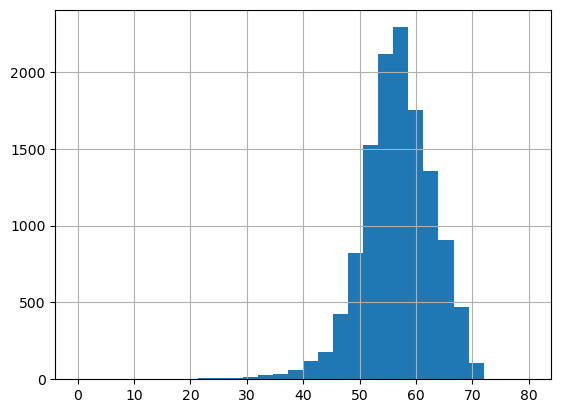

In [41]:
df_sum_conc['rougher.input.raw_sum'].hist(bins=30, range =(0,80))

<Axes: >

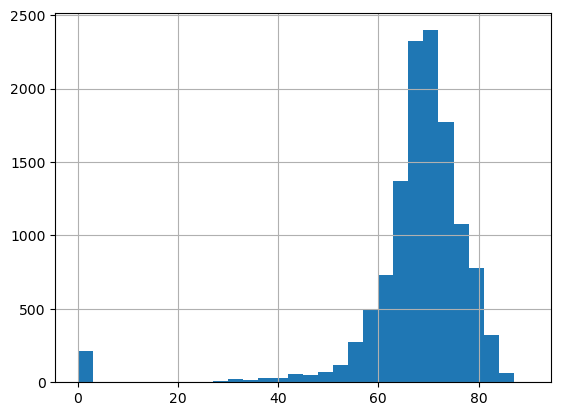

In [42]:
df_sum_conc['rougher.output.concentrate_sum'].hist(bins=30, range =(0,90))

<Axes: >

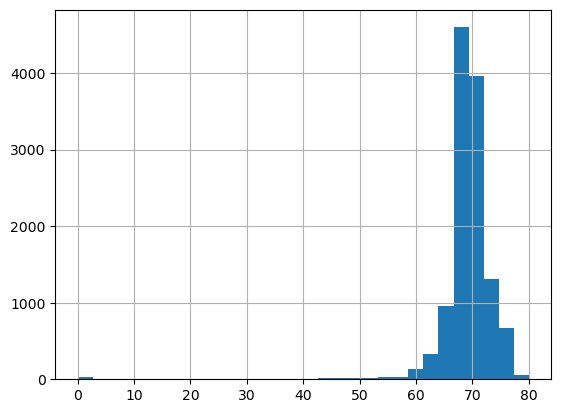

In [43]:
df_sum_conc['final.output.concentrate_sum'].hist(bins=30, range =(0,80))

<Axes: >

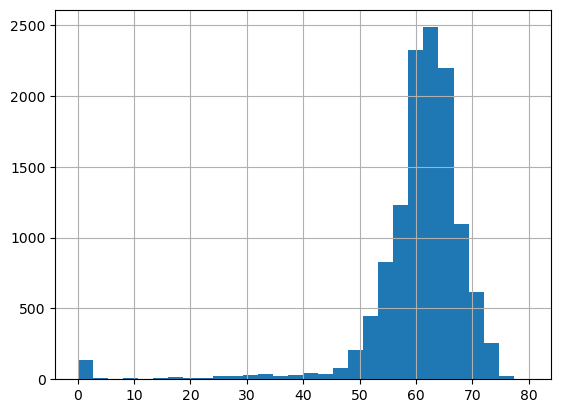

In [44]:
df_sum_conc['primary_cleaner.output.concentrate_sum'].hist(bins=30, range =(0,80))

According to the provided graphs, we see that there are zero values of the total concentration at the purification stages. Since we will be predicting the recovery values of gold from ore, we need to get rid of zero values.

We have the key features of rougher.output.recovery and final.output.recovery. If our shares of elements after cleaning are equal to 0, then the target features themselves will also be equal to 0.

Let's check the zero values.

In [45]:
df_train.loc[df_train.loc[:,'rougher.output.recovery'] == 0]['rougher.output.recovery'].count()

206

In [46]:
df_train.loc[df_train.loc[:,'final.output.recovery'] == 0]['final.output.recovery'].count()

31

In [47]:
df_train = df_train.loc[df_train.loc[:,'rougher.output.recovery'] > 0]
df_train = df_train.loc[df_train.loc[:,'final.output.recovery'] > 0]
df_train.head()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,rough_recov_calc,rougher.input.raw_sum,rougher.output.concentrate_sum,primary_cleaner.output.concentrate_sum,final.output.concentrate_sum
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,...,-498.310211,8.079666,-500.470978,14.151341,-605.841980,87.107763,51.680034,66.424950,72.640924,63.644396
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,...,-500.169983,7.984757,-500.582168,13.998353,-599.787184,86.843261,50.659114,67.012710,72.543485,63.957723
2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,123.819808,...,-500.129135,8.013877,-500.517572,14.028663,-601.427363,86.842308,50.609929,66.103793,72.095042,64.311180
2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,122.270188,...,-499.201640,7.977324,-500.255908,14.005551,-599.996129,87.226430,51.061546,65.752751,59.957723,63.573449
2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,117.988169,...,-501.686727,7.894242,-500.356035,13.996647,-601.496691,86.688794,47.859163,65.908382,71.321010,64.004667


**Conclusion 2.3.**

1. The total concentrations are distributed normally.
2. It should be noted that:
- after flotation, the concentration increases;
- further, after primary purification, the total concentration decreases;
- at the same time, after secondary purification, the total concentration of substances increases again, but not as much as at the first stage. This may be due to the fact that during the cleaning stages, part of the volume of useful elements comes out together with the slag.

## Model

### 3.1. Preparing a function for calculating the final sMAPE

In [48]:
def smape_count_total(t_1, p_1, t_2, p_2):
    #t_1 & t_2 - target
    #p_1 & p_2 - predicted value
    smape_rough = 100 * (1/len(t_1))*sum(abs(t_1-p_1)/((abs(t_1)+abs(p_1))/2))
    smape_final = 100 * (1/len(t_1))*sum(abs(t_2-p_2)/((abs(t_2)+abs(p_2))/2))
    smape_total = 0.25 * smape_rough + 0.75 * smape_final
    return smape_total

In [49]:
def smape_count(t_1, p_1):
    #t_1 - target
    #p_1 - predicted value
    smape = 100 * (1/len(t_1))*sum(abs(t_1-p_1)/((abs(t_1)+abs(p_1))/2))
    return smape

### 3.2. Machine learning models preparation

As features in the datasets have numerical values, we will need to predict the numerical value, so regression methods of machine learning are suitable for this task.

Let's go back to the training and test sample once again to check which target features to take and which ones we will predict.

An important indicator for us is the efficiency of recovery of raw materials after processing. 
At the same time, it should be noted that there are 2 of them in the full dataset:
- *- *rougher.output.recovery* - the effect of recovering gold from ore after flotation
- *- *final.output.recovery* - the effect of recovering gold from ore after purification

These indicators show how effective the recovery process is. We will use them to estimate the symmetric mean absolute percentage deviation of sMAPE.

It should be noted that there are no such signs in the test sample.
Therefore, we first need to predict *rougher.output.recovery*, and then *final.output.recovery*. Next, we will evaluate sMAPE.

At this stage, we will predict the target signs - the effectiveness of recovery after flotation and final cleaning. Let's take a training sample and denote the signs.

In [50]:
df_train_drop = df_train.drop(['final.output.concentrate_ag', 'final.output.concentrate_pb',
                               'final.output.concentrate_sol', 'final.output.concentrate_au',
                               'final.output.tail_ag', 'final.output.tail_pb',
                               'final.output.tail_sol', 'final.output.tail_au',
                               'primary_cleaner.output.concentrate_ag', 'primary_cleaner.output.concentrate_pb',
                               'primary_cleaner.output.concentrate_sol', 'primary_cleaner.output.concentrate_au',
                               'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_pb',
                               'primary_cleaner.output.tail_sol', 'primary_cleaner.output.tail_au',
                               'rougher.calculation.sulfate_to_au_concentrate','rougher.calculation.floatbank10_sulfate_to_au_feed',
                               'rougher.calculation.floatbank11_sulfate_to_au_feed','rougher.calculation.au_pb_ratio',
                               'rougher.output.concentrate_ag','rougher.output.concentrate_pb',
                               'rougher.output.concentrate_sol', 'rougher.output.concentrate_au',
                               'rougher.output.tail_ag',  'rougher.output.tail_pb',
                               'rougher.output.tail_sol', 'rougher.output.tail_au',
                               'secondary_cleaner.output.tail_ag', 'secondary_cleaner.output.tail_pb',
                               'secondary_cleaner.output.tail_sol','secondary_cleaner.output.tail_au',
                               'rough_recov_calc', 'rougher.input.raw_sum', 'rougher.output.concentrate_sum',
                               'primary_cleaner.output.concentrate_sum', 'final.output.concentrate_sum'
                               ], axis=1)


not_in_rougher = [ 'primary_cleaner.input.sulfate', 'rougher.output.recovery', 'final.output.recovery',
                  'primary_cleaner.input.depressant', 'primary_cleaner.input.feed_size',
                  'primary_cleaner.input.xanthate','primary_cleaner.state.floatbank8_a_air',
                  'primary_cleaner.state.floatbank8_a_level','primary_cleaner.state.floatbank8_b_air',
                  'primary_cleaner.state.floatbank8_b_level','primary_cleaner.state.floatbank8_c_air',
                  'primary_cleaner.state.floatbank8_c_level','primary_cleaner.state.floatbank8_d_air',
                  'primary_cleaner.state.floatbank8_d_level','secondary_cleaner.state.floatbank2_a_air',
                  'secondary_cleaner.state.floatbank2_a_level','secondary_cleaner.state.floatbank2_b_air',
                  'secondary_cleaner.state.floatbank2_b_level','secondary_cleaner.state.floatbank3_a_air',
                  'secondary_cleaner.state.floatbank3_a_level','secondary_cleaner.state.floatbank3_b_air',
                  'secondary_cleaner.state.floatbank3_b_level','secondary_cleaner.state.floatbank4_a_air',
                  'secondary_cleaner.state.floatbank4_a_level','secondary_cleaner.state.floatbank4_b_air',
                  'secondary_cleaner.state.floatbank4_b_level','secondary_cleaner.state.floatbank5_a_air',
                  'secondary_cleaner.state.floatbank5_a_level','secondary_cleaner.state.floatbank5_b_air',
                  'secondary_cleaner.state.floatbank5_b_level','secondary_cleaner.state.floatbank6_a_air',
                  'secondary_cleaner.state.floatbank6_a_level']


features_train_rougher = df_train_drop.drop(not_in_rougher, axis = 1)
features_train_final = df_train_drop.drop(['rougher.output.recovery', 'final.output.recovery'], axis = 1)
target_train_rougher = df_train_drop['rougher.output.recovery']
target_train_final = df_train_drop['final.output.recovery']


smape_scorer = make_scorer(smape_count, greater_is_better=False)

We will check the models using the GridSearchCV for 3 modelsto predict the effectiveness of recovery after flotation.

*- Linear regression*

In [55]:
%%time
model_lin_regr_rougher = LinearRegression() 
model_lin_regr_final = LinearRegression() 
parametrs_lin_regr = {
                      'n_jobs': [ -1, 1 ] }

grid_lin_rerg_rougher = GridSearchCV(model_lin_regr_rougher, parametrs_lin_regr,cv=5, scoring = smape_scorer)
grid_lin_rerg_final = GridSearchCV(model_lin_regr_final, parametrs_lin_regr,cv=5, scoring = smape_scorer)

grid_lin_rerg_rougher.fit(features_train_rougher, target_train_rougher)
grid_lin_rerg_final.fit(features_train_final, target_train_final)

print('Best parametr - rougher:', grid_lin_rerg_rougher.best_params_)
print('Best parametr - final:', grid_lin_rerg_final.best_params_)
print('Best parametr - sMAPE rougher:', grid_lin_rerg_rougher.best_score_)
print('Best parametr - sMAPE final:', grid_lin_rerg_final.best_score_)

Best parametr - rougher: {'n_jobs': -1}
Best parametr - final: {'n_jobs': -1}
Best parametr - sMAPE rougher: -6.110579066445511
Best parametr - sMAPE final: -9.98988857346689
CPU times: user 7.74 s, sys: 2.12 s, total: 9.86 s
Wall time: 1.04 s


*- DecisionTreeRegressor*

In [56]:
%%time
model_tree_regr_rougher = DecisionTreeRegressor()
model_tree_regr_final = DecisionTreeRegressor()

parametrs_tree_regr = {'splitter': ['best', 'random'],
                       'max_depth': range (2, 10, 1)}

grid_tree_regr_rougher = GridSearchCV(model_tree_regr_rougher, parametrs_tree_regr, cv=5, scoring = smape_scorer)
grid_tree_regr_final = GridSearchCV(model_tree_regr_final, parametrs_tree_regr, cv=5, scoring = smape_scorer)

grid_tree_regr_rougher.fit(features_train_rougher, target_train_rougher)
grid_tree_regr_final.fit(features_train_final, target_train_final)

print('Best parametr - rougher:', grid_tree_regr_rougher.best_params_)
print('Best parametr - final:', grid_tree_regr_final.best_params_)
print('Best parametr - sMAPE rougher:', grid_tree_regr_rougher.best_score_)
print('Best parametr - sMAPE final:', grid_tree_regr_final.best_score_)

Best parametr - rougher: {'max_depth': 3, 'splitter': 'random'}
Best parametr - final: {'max_depth': 2, 'splitter': 'best'}
Best parametr - sMAPE rougher: -6.17615955655723
Best parametr - sMAPE final: -8.789334982613866
CPU times: user 13.3 s, sys: 79 ms, total: 13.4 s
Wall time: 13.4 s


*- RandomForestRegressor*

In [57]:
%%time
model_ranfor_regr_rougher = RandomForestRegressor()
model_ranfor_regr_final = RandomForestRegressor()

parametrs_ranfor_regr = {'n_estimators': range (20, 100, 20)}

grid_ranfor_regr_rougher = GridSearchCV(model_ranfor_regr_rougher, parametrs_ranfor_regr,cv=5, 
                                        scoring = smape_scorer)
grid_ranfor_regr_final = GridSearchCV(model_ranfor_regr_final, parametrs_ranfor_regr,cv=5, 
                                      scoring = smape_scorer)

grid_ranfor_regr_rougher.fit(features_train_rougher, target_train_rougher)
grid_ranfor_regr_final.fit(features_train_final, target_train_final)

print('Лучшие параметры rougher:', grid_ranfor_regr_rougher.best_params_)
print('Лучшие параметры для final:', grid_ranfor_regr_rougher.best_params_)
print('Лучший параметр sMAPE rougher:', grid_ranfor_regr_rougher.best_score_)
print('Лучший параметр sMAPE final:', grid_ranfor_regr_rougher.best_score_)


Лучшие параметры rougher: {'n_estimators': 80}
Лучшие параметры для final: {'n_estimators': 80}
Лучший параметр sMAPE rougher: -6.456879946442237
Лучший параметр sMAPE final: -6.456879946442237
CPU times: user 10min 16s, sys: 4.7 s, total: 10min 21s
Wall time: 10min 25s


Finaly, RandomForestRegressor is the best model

In [58]:

%%time
#best_rf_params = grid.best_params_

model_ranfor_regr_rougher = RandomForestRegressor(**grid_ranfor_regr_rougher.best_params_)
model_ranfor_regr_final = RandomForestRegressor(**grid_ranfor_regr_final.best_params_)


model_ranfor_regr_rougher.fit(features_train_rougher, target_train_rougher)
model_ranfor_regr_final.fit(features_train_final, target_train_final)


pred_train_ranfor_regr_rougher = model_ranfor_regr_rougher.predict(features_train_rougher)
pred_train_ranfor_regr_final = model_ranfor_regr_final.predict(features_train_final)


print('sMAPE_total, train sample', smape_count_total(target_train_rougher, pred_train_ranfor_regr_rougher,
                                           target_train_final, pred_train_ranfor_regr_final))



sMAPE_total, train sample 1.6180422155806773
CPU times: user 47.2 s, sys: 335 ms, total: 47.5 s
Wall time: 47.6 s


### 3.3 Checking the model on a test sample and calculating sMAPE.

In [59]:
not_in_rougher_test = [ 'primary_cleaner.input.sulfate','primary_cleaner.input.depressant', 'primary_cleaner.input.feed_size',
                       'primary_cleaner.input.xanthate','primary_cleaner.state.floatbank8_a_air',
                       'primary_cleaner.state.floatbank8_a_level','primary_cleaner.state.floatbank8_b_air',
                       'primary_cleaner.state.floatbank8_b_level','primary_cleaner.state.floatbank8_c_air',
                       'primary_cleaner.state.floatbank8_c_level','primary_cleaner.state.floatbank8_d_air',
                       'primary_cleaner.state.floatbank8_d_level', 'secondary_cleaner.state.floatbank2_a_air',
                       'secondary_cleaner.state.floatbank2_a_level','secondary_cleaner.state.floatbank2_b_air',
                       'secondary_cleaner.state.floatbank2_b_level','secondary_cleaner.state.floatbank3_a_air',
                       'secondary_cleaner.state.floatbank3_a_level','secondary_cleaner.state.floatbank3_b_air',
                       'secondary_cleaner.state.floatbank3_b_level','secondary_cleaner.state.floatbank4_a_air',
                       'secondary_cleaner.state.floatbank4_a_level','secondary_cleaner.state.floatbank4_b_air',
                       'secondary_cleaner.state.floatbank4_b_level','secondary_cleaner.state.floatbank5_a_air',
                       'secondary_cleaner.state.floatbank5_a_level','secondary_cleaner.state.floatbank5_b_air',
                       'secondary_cleaner.state.floatbank5_b_level','secondary_cleaner.state.floatbank6_a_air',
                       'secondary_cleaner.state.floatbank6_a_level']

features_test_rougher = df_test.drop(not_in_rougher_test, axis = 1)
features_test_final = df_test

target_test_rougher = df_full['rougher.output.recovery'].loc[features_test_rougher.index]
target_test_final = df_full['final.output.recovery'].loc[features_test_final.index]

In [60]:
#target_test_rougher = df_full['rougher.output.recovery'].loc[features_test_rougher.index]
#target_test_final = df_full['final.output.recovery'].loc[features_test_final.index]

test_ranfor_regr_rougher = model_ranfor_regr_rougher.predict(features_test_rougher)
test_ranfor_regr_final = model_ranfor_regr_final.predict(features_test_final)

#введем DummyClassifier для проверки на адекватность.
d_model_rougrer = DummyRegressor(strategy='mean')
d_model_final = DummyRegressor(strategy='mean')

d_model_rougrer.fit(features_train_rougher, target_train_rougher)
d_model_final.fit(features_train_final, target_train_final)

pred_test_rougrer = d_model_rougrer.predict(features_test_rougher)
pred_test_final = d_model_final.predict(features_test_rougher)

sMAPE_test = smape_count_total(target_test_rougher, test_ranfor_regr_rougher, 
                         target_test_final, test_ranfor_regr_final)
sMAPE_d = smape_count_total(target_test_rougher, pred_test_rougrer, 
                         target_test_final, pred_test_final)

print('sMAPE_test', sMAPE_test)
print('sMAPE_d', sMAPE_d)

sMAPE_test 9.158184997561682
sMAPE_d 9.208949720540762


## Results of the research

According to the results of the study, it can be seen that

1) The proportion of gold at each stage of purification becomes higher, therefore this processing technology is effective.

2) The random forest model in regression proved to be the best.

3) The final smaper on the test sample was 9.184776942388709, which is 0.02 less than in DummyRegressor.